In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
train_id = data['Id']
data.drop(columns=['Id'], inplace=True)
tesst_id = test_data['Id']
test_data.drop(columns=['Id'], inplace=True)

## EDA & Data Processing

### Numerical or Categorical?

Actually there are some numerical attributes that is actually categorical

In [6]:
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['OverallCond'] = data['OverallCond'].astype(str)

test_data['MSSubClass'] = test_data['MSSubClass'].apply(str)
test_data['OverallCond'] = test_data['OverallCond'].astype(str)

In [7]:
num_attrs = [col for col in data.columns if data.dtypes[col] != 'object']
num_attrs.remove('SalePrice')
cat_attrs = [col for col in data.columns if data.dtypes[col] == 'object']

### Overview

In [8]:
print('Shape of data: {}\n'.format(data.shape))
print('# of Numerical Attributes: {}'.format(len(num_attrs)))
print('Numerical Attributes: {}\n'.format(', '.join(num_attrs)))
print('# of Categorical Attributes: {}'.format(len(cat_attrs)))
print('Categorical Attributes: {}'.format(', '.join(cat_attrs)))

Shape of data: (1460, 80)

# of Numerical Attributes: 34
Numerical Attributes: LotFrontage, LotArea, OverallQual, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold

# of Categorical Attributes: 45
Categorical Attributes: MSSubClass, MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallCond, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDriv

### Missing Values

,Missing Ratio
PoolQC,0.996574
MiscFeature,0.964029
Alley,0.932169
Fence,0.804385
FireplaceQu,0.486468
LotFrontage,0.166495
GarageFinish,0.054471
GarageYrBlt,0.054471
GarageQual,0.054471
GarageCond,0.054471


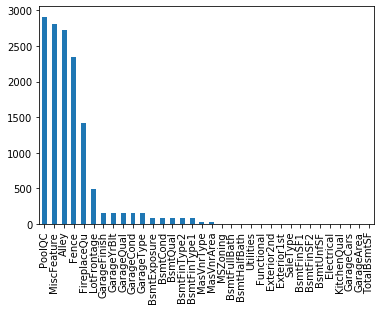

In [9]:
missing = pd.concat([data.drop(columns='SalePrice'), test_data]).isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False, inplace=True)
missing.plot.bar()

missing_rate = pd.DataFrame({'Missing Ratio': missing / (data.shape[0] + test_data.shape[0])})
missing_rate

19 attributes have missing values, 4 over 50% of all data. However, referencing the data description, most of times NA means lack of subject described by attribute, like missing pool, fence, no garage and basement. We need to look close to them.

- **PoolQC:**: pool quality.

'NA' means "No Pool"

In [10]:
data["PoolQC"] = data["PoolQC"].fillna("None")
test_data["PoolQC"] = test_data["PoolQC"].fillna("None")

- **MiscFeature:** Miscellaneous feature not covered in other categories.

'NA' means "None"

In [11]:
data["MiscFeature"] = data["MiscFeature"].fillna("None")
test_data["MiscFeature"] = test_data["MiscFeature"].fillna("None")

- **Alley:** Type of alley access to property.

'NA' means "No alley access"

In [12]:
data["Alley"] = data["Alley"].fillna("None")
test_data["Alley"] = test_data["Alley"].fillna("None")

- **Fence:** Fence quality.

'NA' means "No Fence"

In [13]:
data["Fence"] = data["Fence"].fillna("None")
test_data["Fence"] = test_data["Fence"].fillna("None")

- **FireplaceQu:** Fireplace quality.

'NA' means "No Fireplace"

In [14]:
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")
test_data["FireplaceQu"] = test_data["FireplaceQu"].fillna("None")

- **LotFrontage:** Linear feet of street connected to property.

The area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we decide to fill in the missing data by the median **LotFrontage** of the neighborhood.

In [15]:
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
test_data["LotFrontage"] = test_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

- **GarageType, GarageFinish, GarageQual and GarageCond:** Garage Location, Interior finish of the Garage, Garage Quality and Garage Condition respectively.

'NA' means "No Garage"

In [16]:
for grg_cate in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[grg_cate] = data[grg_cate].fillna('None')
    test_data[grg_cate] = test_data[grg_cate].fillna('None')

- **GarageYrBlt, GarageArea and GarageCars:** Year Garage built, Size of Garage and Car Capacity of Garage respectively.

Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [17]:
for grg_num in ('GarageArea', 'GarageCars'):
    data[grg_num] = data[grg_num].fillna(0)
    test_data[grg_num] = test_data[grg_num].fillna(0)
    
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean())
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean())


- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2:** Height of Basement, Condition of Basement, Walkout or Garden Level Walls, Rating of Basement Finished Area 1&2 respectively.

"NA" means "No Basement"

In [18]:
for bsmt in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[bsmt] = data[bsmt].fillna('None')
    test_data[bsmt] = test_data[bsmt].fillna('None')

- **MasVnrType and MasVnrArea:** Masonry Veneer Type and  Masonry Veneer Area.

In the data description, there is no "NA" type. Thus, we regard this as "None", since the corresponding variable **MasVnrArea** also shows "NA". And we will replace the latter variable with 0.

In [19]:
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)
test_data["MasVnrType"] = test_data["MasVnrType"].fillna("None")
test_data["MasVnrArea"] = test_data["MasVnrArea"].fillna(0)

- **MSZoning:** Identifies the general zoning classification of the sale.

No 'NA' type. Fill with modes.

In [20]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])
test_data['MSZoning'] = test_data['MSZoning'].fillna(data['MSZoning'].mode()[0])

- **BsmtFullBath:** Basement full bathrooms

Seems 'NA' means no. Fill with 0

In [21]:
data['BsmtFullBath'] = data['BsmtFullBath'].fillna(0)
test_data['BsmtFullBath'] = test_data['BsmtFullBath'].fillna(0)

- **BsmtHalfBath:** Basement half bathrooms

Seems 'NA' means no. Fill with 0

In [22]:
data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(0)
test_data['BsmtHalfBath'] = test_data['BsmtHalfBath'].fillna(0)

- **Utilities:** Type of utilities available

Fill 'NA' with mode.

In [23]:
data['Utilities'] = data['Utilities'].fillna(data['Utilities'].mode()[0])
test_data['Utilities'] = test_data['Utilities'].fillna(data['Utilities'].mode()[0])

- **Functional:** Home functionality (Assume typical unless deductions are warranted)

Fill 'NA' with mode.

In [24]:
data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])
test_data['Functional'] = test_data['Functional'].fillna(data['Functional'].mode()[0])

- **Rest of the attributes:**

Since there is only one 'NA' in all of the rest attributes, we will just fill mode for categorical attributes and mean for numerical attributes

In [25]:
for attr in ('Exterior2nd',
              'Exterior1st', 
              'SaleType', 
              'BsmtFinSF1', 
              'BsmtFinSF2', 
              'BsmtUnfSF', 
              'Electrical', 
              'KitchenQual', 
              'GarageCars', 
              'GarageArea', 
              'TotalBsmtSF'):
    if attr in num_attrs:
        data[attr] = data[attr].fillna(data[attr].mean())
        test_data[attr] = test_data[attr].fillna(data[attr].mean())
    elif attr in cat_attrs:
        data[attr] = data[attr].fillna(data[attr].mode()[0])
        test_data[attr] = test_data[attr].fillna(data[attr].mode()[0])

Now we check if there is any missing values anymore.

In [26]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False, inplace=True)
missing_rate = pd.DataFrame({'Missing Ratio': missing / data.shape[0]})
missing_rate

,Missing Ratio


In [27]:
missing = test_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False, inplace=True)
missing_rate = pd.DataFrame({'Missing Ratio': missing / data.shape[0]})
missing_rate

,Missing Ratio


### Correlation Matrix

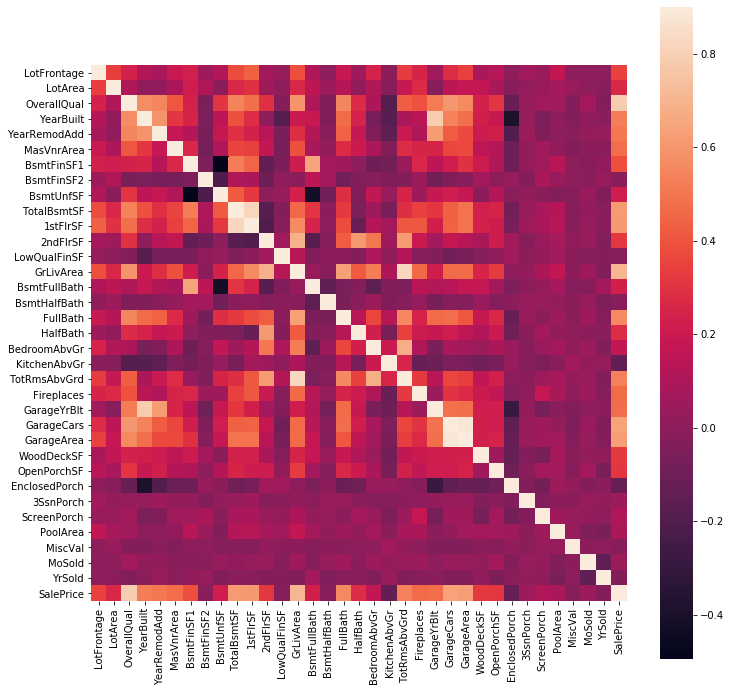

In [28]:
corrmat = data[num_attrs + ['SalePrice']].corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, vmax=0.9, square=True)

There are many bright place. Amoung them maybe the most correlated pairs are **GarageCars** and **GarageArea**. What's the value?

In [29]:
corrmat.loc['GarageCars', 'GarageArea']

0.8824754142814603

High but somehow acceptable. We will leave both of them remains in the dataset.

### Numerical Data

#### Distribution

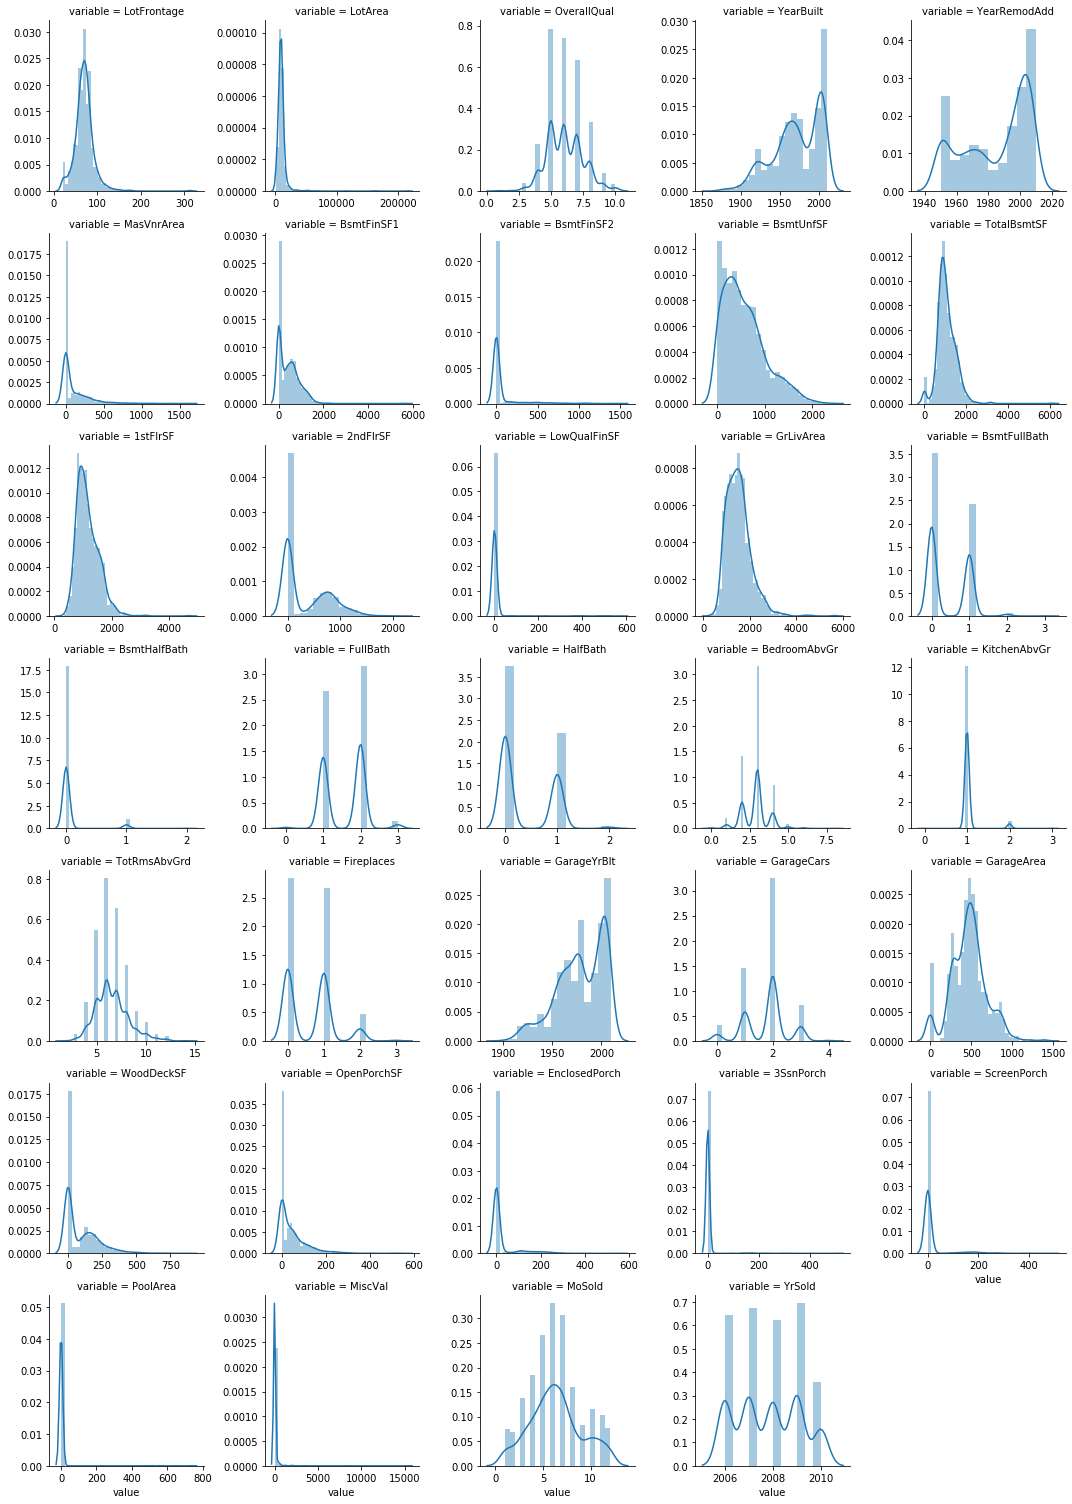

In [30]:
# problems in statsmodels of estimating bin width
sns.distributions._has_statsmodels = False

f = pd.melt(data, value_vars=num_attrs)
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

sns.distributions._has_statsmodels = True

Some independent variables look like good candidates for log transformation: TotalBsmtSF, KitchenAbvGr, LotFrontage, LotArea and others. While ganining on regression transformation will smooth out some irregularities which could be important like large amount of houses with 0 2ndFlrSF. Such irregularities are good candidates for feature construction.

#### Relationship with target

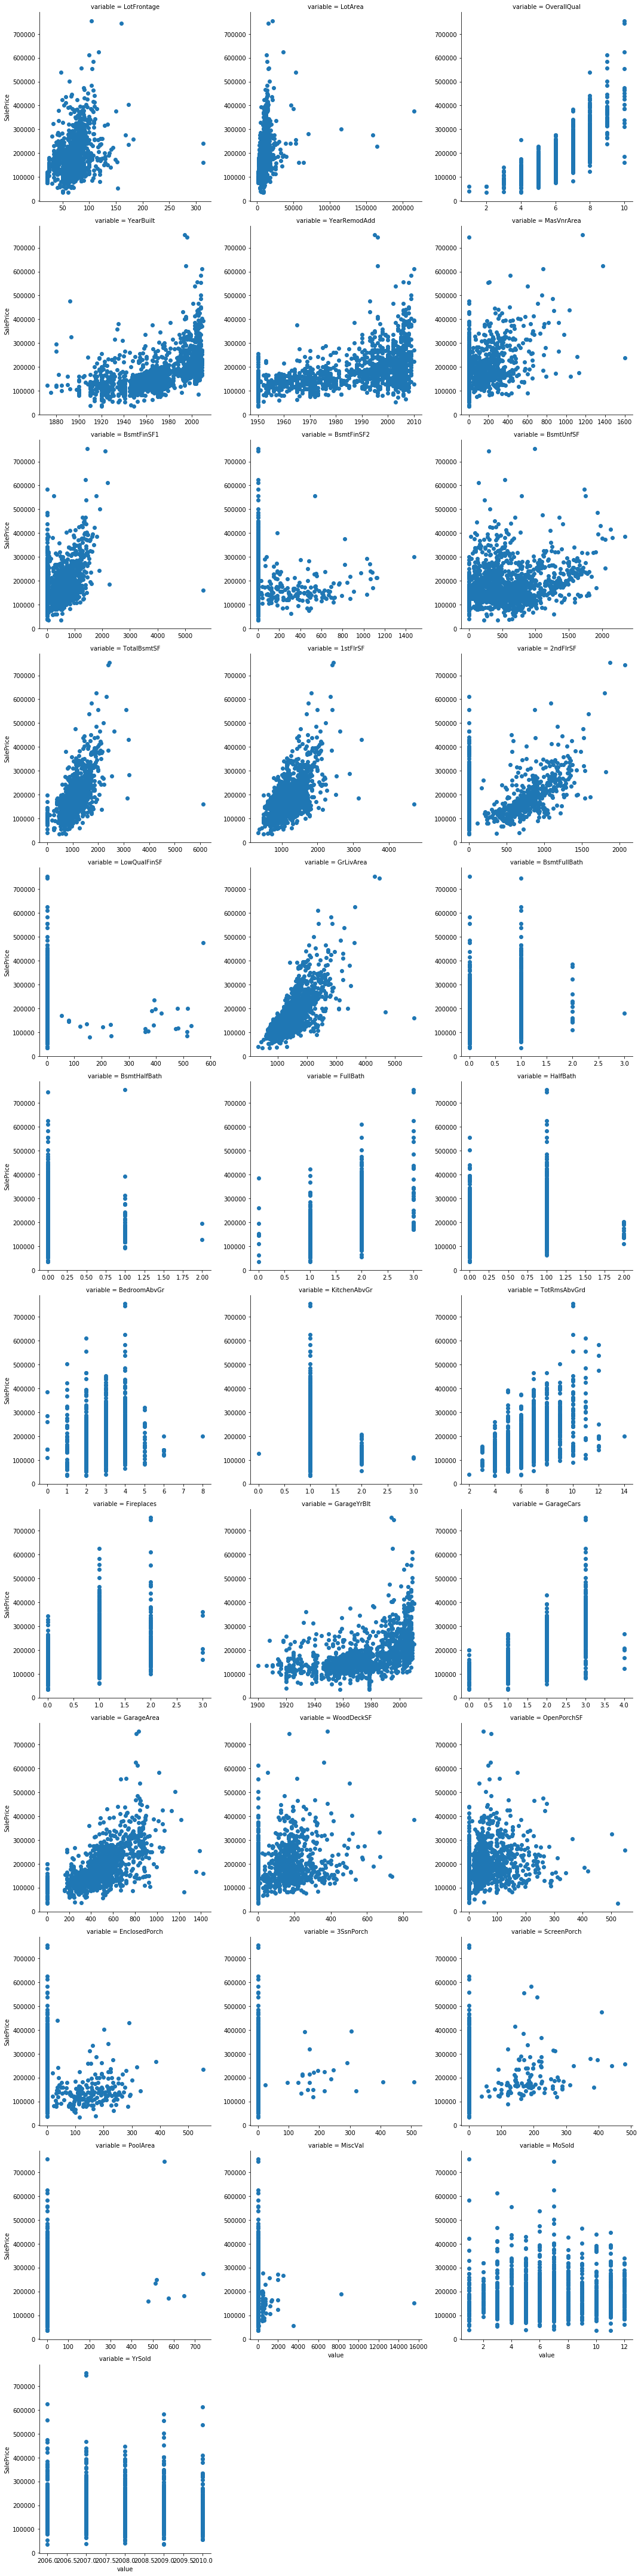

In [31]:
f = pd.melt(data, id_vars=['SalePrice'], value_vars=num_attrs)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(plt.scatter, "value", "SalePrice")

We see there are some outliers. However, outliers removal is note always safe. We decided to delete these two as they are very huge and really bad (extremely large areas for very low prices).

In [32]:
data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)

There are probably others outliers in the training data. However, removing all them may affect badly our models if ever there were also outliers in the test data. That's why , instead of removing them all, we will just manage to make some of our models robust on them. You can refer to the modelling part of this notebook for that.

#### Transformation

We are going to do log transformation based on the skewness of the attributes.

In [33]:
skewed_feats = data[num_attrs].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness

,Skew
MiscVal,24.434913
PoolArea,15.932532
LotArea,12.560986
3SsnPorch,10.286510
LowQualFinSF,8.995688
KitchenAbvGr,4.480268
BsmtFinSF2,4.247550
ScreenPorch,4.114690
BsmtHalfBath,4.095895
EnclosedPorch,3.083987


We choose those with skewness>1 to perform the log transformation

In [34]:
skewness_consider = skewness[skewness['Skew'] > 1]
print("There are {} skewed numerical features to Log transform".format(skewness_consider.shape[0]))

skewed_features = skewness_consider.index

trans_num_feats_dict = {}

for feat in skewed_features:
    feat_name = 'Log_{}'.format(feat)
    data[feat_name] = np.log1p(data[feat])
    test_data[feat_name] = np.log1p(test_data[feat])
    trans_num_feats_dict[feat] = feat_name


There are 15 skewed numerical features to Log transform


All the numerical attributes should take into consideration after transformatin:

In [35]:
model_num_attrs = []
for attr in num_attrs:
    if attr in trans_num_feats_dict:
        model_num_attrs.append(trans_num_feats_dict[attr])
    else:
        model_num_attrs.append(attr)
model_num_attrs

['Log_LotFrontage',
 'Log_LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'Log_MasVnrArea',
 'BsmtFinSF1',
 'Log_BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'Log_LowQualFinSF',
 'Log_GrLivArea',
 'BsmtFullBath',
 'Log_BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Log_KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'Log_WoodDeckSF',
 'Log_OpenPorchSF',
 'Log_EnclosedPorch',
 'Log_3SsnPorch',
 'Log_ScreenPorch',
 'Log_PoolArea',
 'Log_MiscVal',
 'MoSold',
 'YrSold']

#### Add one feature

Adding the sum of area of the house may be usful

In [36]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
test_data['TotalSF'] = test_data['TotalBsmtSF'] + test_data['1stFlrSF'] + test_data['2ndFlrSF']
model_num_attrs.append('TotalSF')

### Categorical Data

#### Relationship with target

We examine the their relationship with target.

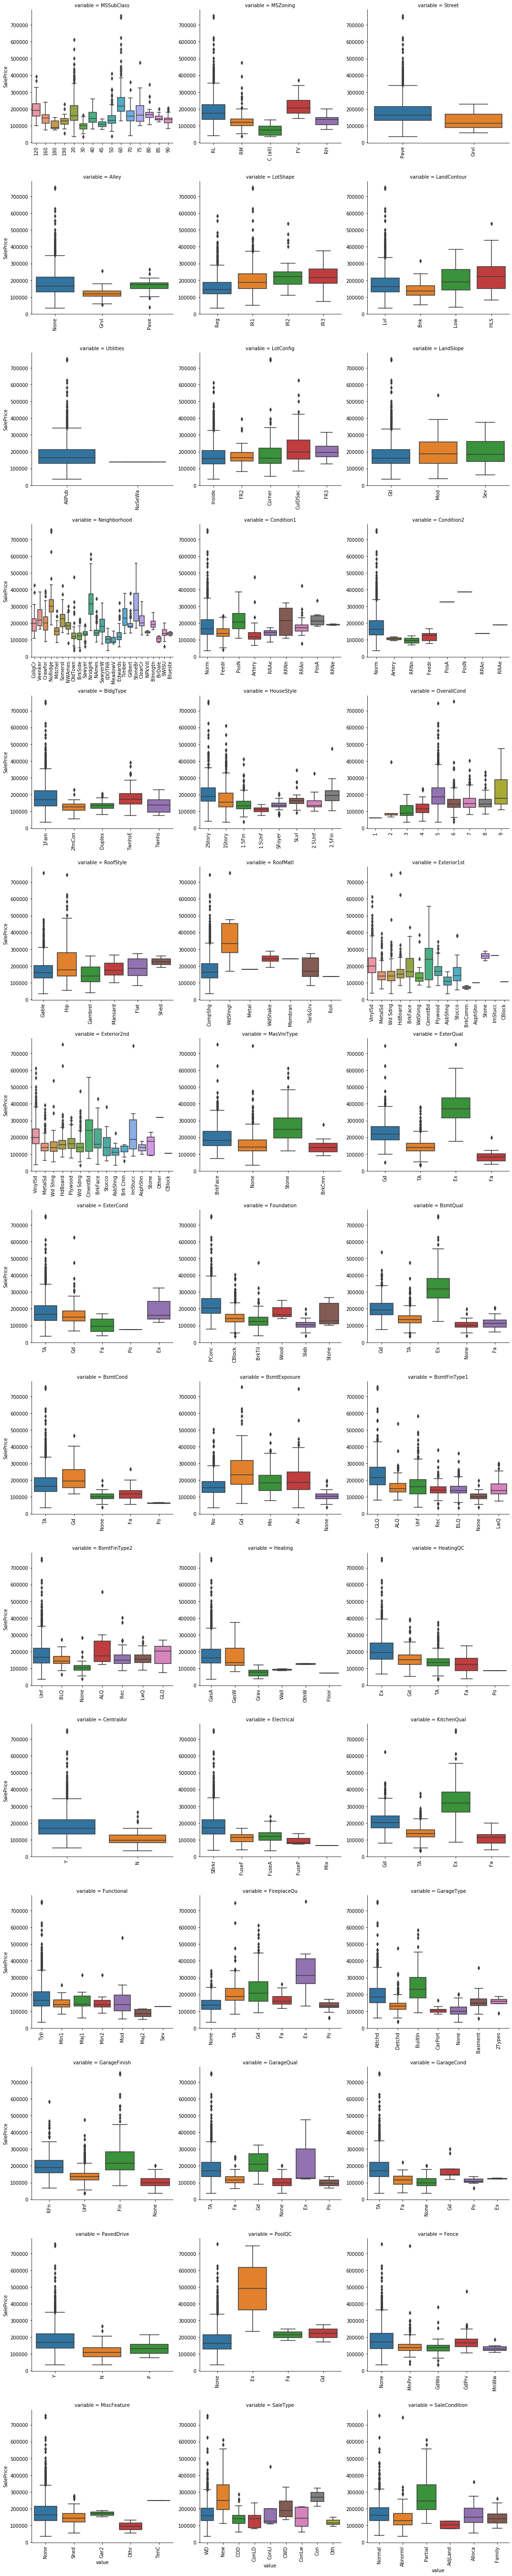

In [37]:
for c in cat_attrs:
    data[c] = data[c].astype('category')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(data, id_vars=['SalePrice'], value_vars=cat_attrs)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

Most categories seems to have impact on target **SalePrice**. Some categorical variables that may contain information in their ordering set, and we will use Label encoding on them. For else, we will use One-hot encoding.

#### Encoding

Label Encoding

In [38]:
model_cat_attrs = []

ordering_attrs = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
                  'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
                  'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
                  'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
                  'YrSold', 'MoSold')

for attr in ordering_attrs:
    new_name = 'Encoded_{}'.format(attr)
    model_cat_attrs.append(new_name)
    lbl = LabelEncoder() 
    lbl.fit(list(data[attr].values) + list(test_data[attr].values)) 
    data[new_name] = lbl.transform(list(data[attr].values))
    test_data[new_name] = lbl.transform(list(test_data[attr].values))

One-hot encoding

In [39]:
other_cat_attrs = [attr for attr in cat_attrs if attr not in ordering_attrs]
data['isTest'] = 0
test_data['isTest'] = 1
concat_data = pd.concat([data[other_cat_attrs + ['isTest']], test_data[other_cat_attrs + ['isTest']]])
data_dummy = pd.get_dummies(concat_data[other_cat_attrs], drop_first=True)
data = pd.concat([data, data_dummy[concat_data['isTest'] == 0]], axis=1)
test_data = pd.concat([test_data, data_dummy[concat_data['isTest'] == 1]], axis=1)

model_cat_attrs.extend(data_dummy.columns)

model_cat_attrs

['Encoded_FireplaceQu',
 'Encoded_BsmtQual',
 'Encoded_BsmtCond',
 'Encoded_GarageQual',
 'Encoded_GarageCond',
 'Encoded_ExterQual',
 'Encoded_ExterCond',
 'Encoded_HeatingQC',
 'Encoded_PoolQC',
 'Encoded_KitchenQual',
 'Encoded_BsmtFinType1',
 'Encoded_BsmtFinType2',
 'Encoded_Functional',
 'Encoded_Fence',
 'Encoded_BsmtExposure',
 'Encoded_GarageFinish',
 'Encoded_LandSlope',
 'Encoded_LotShape',
 'Encoded_PavedDrive',
 'Encoded_Street',
 'Encoded_Alley',
 'Encoded_CentralAir',
 'Encoded_MSSubClass',
 'Encoded_OverallCond',
 'Encoded_YrSold',
 'Encoded_MoSold',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Ne

### Target

Examine the distribution pattern of the target.

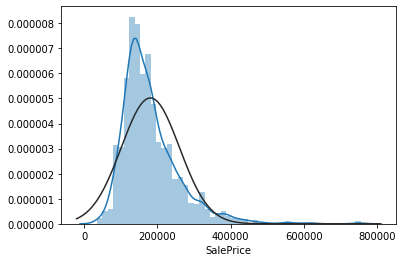

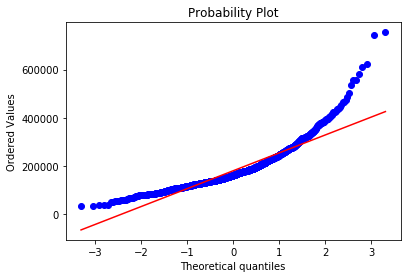

In [40]:
plt.figure()
sns.distplot(data['SalePrice'], fit=stats.norm)

plt.figure()
_ = stats.probplot(data['SalePrice'], plot=plt)

Apparently not normally distributed. Do a log transformation.

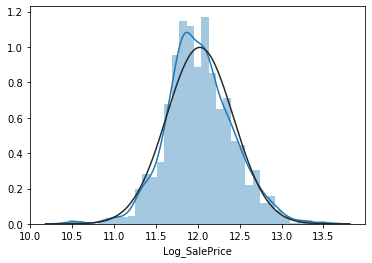

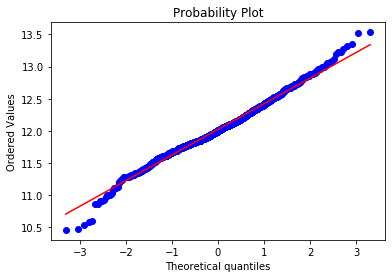

In [41]:
data['Log_SalePrice'] = np.log1p(data['SalePrice'])

plt.figure()
sns.distplot(data['Log_SalePrice'], fit=stats.norm)
plt.figure()
_ = stats.probplot(data['Log_SalePrice'], plot=plt)

### Train test split

Now we are ready to split the data for training and testing.

In [42]:
X = data[model_cat_attrs + model_num_attrs]
print('The shape of X: {}'.format(X.shape))
y = data['Log_SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=2020)
X_test = test_data[model_cat_attrs + model_num_attrs]

The shape of X: (1458, 203)


## Models

In [43]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb

A function to shuffle the data and calculate a CV score on the train set.

In [44]:
def rmsle_cv(model, n_folds=5):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return rmse

Functions to calculate RMSE, RMSLE, MAE, MAPE for the original SalePrice value.

In [45]:
def rmse(y_true, y_pred):
    true = np.exp(y_true) - 1
    pred = np.exp(y_pred) - 1
    return np.sqrt(mean_squared_error(true, pred))

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mae(y_true, y_pred):
    true = np.exp(y_true) - 1
    pred = np.exp(y_pred) - 1
    return mean_absolute_error(true, pred)

def mape(y_true, y_pred):
    true = np.exp(y_true) - 1
    pred = np.exp(y_pred) - 1
    return np.mean(np.abs((true - pred)/true))

Function to print all score

In [46]:
def print_score(model, model_name, n_folds=5):
    score = rmsle_cv(model)
    print('{} CV score: {:.4f} ({:.4f})'.format(model_name, score.mean(), score.std()))
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    print('{} train rmse score: {:.4f}'.format(model_name, rmse(y_train_pred, y_train)))
    print('{} val rmse score: {:.4f}'.format(model_name, rmse(y_val_pred, y_val)))
    print('{} train rmsle score: {:.4f}'.format(model_name, rmsle(y_train_pred, y_train)))
    print('{} val rmsle score: {:.4f}'.format(model_name, rmsle(y_val_pred, y_val)))
    print('{} train mae score: {:.4f}'.format(model_name, mae(y_train_pred, y_train)))
    print('{} val mae score: {:.4f}'.format(model_name, mae(y_val_pred, y_val)))
    print('{} train mape score: {:.2f}%'.format(model_name, 100 * mape(y_train_pred, y_train)))
    print('{} val mape score: {:.2f}%'.format(model_name, 100 * mape(y_val_pred, y_val)))
    return model

In [47]:
models = []

### Outline

- We will try linear regression, regularized linear regression, random forest, gradient boosting tree, and SVM
- To tune all the models with hyperparameters, we use CV grid search on a hyperparameter space.
- We compare their result based on CV rmlse with 5 folds. Wee will also print other interesting metrics we want to check
- Finally, we will try to take average of all the models to see if there is any improvements.

### Linear Regression Based Models

#### Linear Regression

In [48]:
linear = make_pipeline(RobustScaler(), LinearRegression())
linear.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [49]:
score = rmsle_cv(linear)
print('Linear Regression CV score: {:.4f} ({:.4f})'.format(score.mean(), score.std()))

Linear Regression CV score: 1302822962.7540 (1405717229.7366)


Why an absordly large number??? Is there something wrong with the code? A glance at the coefficients give the reason:

In [50]:
linear.fit(X_train, y_train)
linear[-1].coef_

array([-9.50841005e-04, -2.69433290e-02,  3.29827231e-03,  2.61799705e-03,
        3.83279427e-03, -7.78709829e-03,  8.49252528e-03, -3.82038280e-02,
        1.51571568e-01, -1.52876792e-02, -8.90505582e-03,  1.27557161e-03,
        1.90839714e-02, -2.60122487e-03, -1.42745580e-02,  5.43144312e-03,
        1.97568133e-03,  7.84101117e-03,  2.99396391e-02, -9.23207715e-03,
        2.96898692e-03,  8.33969124e-02,  1.42237276e-02,  4.12485423e-02,
       -8.28864980e+10,  1.18130583e+11,  4.98515010e-01,  5.13367519e-01,
        4.80102637e-01,  4.64283872e-01,  1.93579120e-02,  3.70099123e-02,
        9.29616920e-03, -2.07840189e-01,  2.33926050e-02, -2.30073286e-02,
       -7.68760370e-02, -1.17147557e-02,  1.51447344e-02,  6.20941979e-03,
        2.71704943e-02, -1.75715164e-02, -6.08321063e-02,  7.63333468e-02,
       -8.78096424e-02, -4.15551659e-02, -4.39884615e-02, -8.30654803e-02,
       -7.00570549e-02, -4.66380858e-02,  9.89166771e-03, -8.34234325e-02,
       -2.83409408e-02,  

There are large numbers such as e+10, e+9 in there, It looks like the model is overfitting and then highly influenced by some outliers it did not seen. However, in the following models there is no such issue. So we will regard this as the model's fault and not to exclude so much outliers in the dataset because if we remove things too much, those will no longer be "outliers".

#### LASSO

We first use the training set with CV to find the best alpha value.

In [51]:
lassoCV = make_pipeline(RobustScaler(), LassoCV(random_state=2020))
lassoCV.fit(X_train, y_train)
print(lassoCV[-1])
print('alpha: ', lassoCV[-1].alpha_)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=2020,
        selection='cyclic', tol=0.0001, verbose=False)
alpha:  0.00024968267880429553


We will use alpha=0.00025 and then we calculate the CV error again.

In [52]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.00025, random_state=2020)) # tuned based on lassoCV on the whole training set
lasso = print_score(lasso, 'Lasso')
models.append(lasso)

Lasso CV score: 0.1136 (0.0124)
Lasso train rmse score: 17385.5909
Lasso val rmse score: 20621.7483
Lasso train rmsle score: 0.0951
Lasso val rmsle score: 0.1137
Lasso train mae score: 11785.0415
Lasso val mae score: 13800.9500
Lasso train mape score: 6.82%
Lasso val mape score: 7.95%


#### Ridge

We first use the training set with CV to find the best alpha value.

In [53]:
ridgeCV = make_pipeline(RobustScaler(), RidgeCV())
ridgeCV.fit(X_train, y_train)
print('alpha: ', ridgeCV[-1].alpha_)

alpha:  10.0


We will use alpha=10 and then we calculate the CV error again.

In [54]:
ridge = make_pipeline(RobustScaler(), Ridge(alpha=10.))
ridge = print_score(ridge, 'Ridge')
models.append(ridge)

Ridge CV score: 0.1154 (0.0110)
Ridge train rmse score: 17574.3133
Ridge val rmse score: 20749.2541
Ridge train rmsle score: 0.0982
Ridge val rmsle score: 0.1125
Ridge train mae score: 11987.7283
Ridge val mae score: 13834.7838
Ridge train mape score: 6.96%
Ridge val mape score: 7.94%


It is slightly worse than LASSO.

#### ElasticNet

We first use the training set with CV to find the best alpha and l1_ratio value.

In [55]:
enetCV = make_pipeline(RobustScaler(), ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1]))
enetCV.fit(X_train, y_train)
print('alpha: ', enetCV[-1].alpha_)
print('l1_ratio: ', enetCV[-1].l1_ratio_)

alpha:  0.00024968267880429553
l1_ratio:  1.0


It gives l1_ratio=1.0 which means it degenerates to LASSO.

### Random forest

We will also start with hyper-parameter searching.

In [56]:
#rf = RandomForestRegressor(max_features='sqrt')
#param_grid = {'max_depth': [10, 20, 30, 40, 50],
#              'min_samples_leaf': [1, 2, 5, 8],
#              'min_samples_split': [2, 5, 8],
#              'n_estimators': [400, 800, 1200, 1600, 2400]}
#
#grid_search = GridSearchCV(rf, param_grid, scoring='neg_mean_squared_error', n_jobs = -1, verbose=10)    
#grid_search.fit(X_train, y_train)
#grid_search.best_params_

In [57]:
best_params = {'max_depth': 30,
               'min_samples_leaf': 1,
               'min_samples_split': 2,
               'n_estimators': 1600}
rf = RandomForestRegressor(max_features='sqrt', n_jobs=-1, **best_params)
rf = print_score(rf, 'Random Forest')
models.append(rf)

Random Forest CV score: 0.1446 (0.0118)
Random Forest train rmse score: 11626.2593
Random Forest val rmse score: 30031.0517
Random Forest train rmsle score: 0.0530
Random Forest val rmsle score: 0.1308
Random Forest train mae score: 6358.3125
Random Forest val mae score: 16914.2655
Random Forest train mape score: 3.46%
Random Forest val mape score: 8.97%


From the results we can see clear evidence of overfitting of the training set, though for random forest it might be easier to overfit the training set compared to linear regression. The performance of thie model is also not as good as the regularized linear regression methods. Maybe a more careful parameter tuning can improve the result.

### Gradient Boosting Regression 

Hyper-parameter searching.

In [58]:
#gbr = GradientBoostingRegressor(max_features='sqrt')
#
#param_grid = {'max_depth': [2, 4, 8, 12, 16],
#              'min_samples_leaf': [4, 8, 12],
#              'min_samples_split': [2, 5, 8, 10],
#              'n_estimators': [1600, 2400, 3200, 4000],
#              'learning_rate': [0.005, 0.01, 0.05, 0.1]} 
#
#grid_search = GridSearchCV(gbr, param_grid, scoring='neg_mean_squared_error', n_jobs = -1, verbose=10)    
#grid_search.fit(X_train, y_train)
#grid_search.best_params_

In [59]:
best_param = {'learning_rate': 0.01,
              'max_depth': 2,
              'min_samples_leaf': 8,
              'min_samples_split': 2,
              'n_estimators': 3200}
gbr = GradientBoostingRegressor(max_features='sqrt', **best_param)
gbr = print_score(gbr, 'Gradient Boosting Regression')
models.append(gbr)

Gradient Boosting Regression CV score: 0.1180 (0.0117)
Gradient Boosting Regression train rmse score: 14511.9415
Gradient Boosting Regression val rmse score: 23178.5374
Gradient Boosting Regression train rmsle score: 0.0837
Gradient Boosting Regression val rmsle score: 0.1103
Gradient Boosting Regression train mae score: 9763.0174
Gradient Boosting Regression val mae score: 14208.1417
Gradient Boosting Regression train mape score: 5.79%
Gradient Boosting Regression val mape score: 7.74%


This gives better results than the Random Forest, but still a bit worse than the two regularized linear regression methods. Still, maybe a more careful parameter tuning can improve the result.

### Support Vector Machine

In [60]:
#param_grid = {'kernel': ['rbf'],
#              'C':[1, 3, 10, 30, 50, 100], 
#              'gamma': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
#              'epsilon': [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]} 
#grid_search_comp = GridSearchCV(SVR(), param_grid, scoring='neg_mean_squared_error', n_jobs = -1, verbose=10)    
#grid_search = make_pipeline(RobustScaler(), grid_search_comp)
#
#grid_search.fit(X_train, y_train)
#grid_search[-1].best_params_

In [61]:
best_param = {'C': 10,
              'epsilon': 0.05,
              'gamma': 0.0005,
              'kernel': 'rbf'}
svr = make_pipeline(RobustScaler(), SVR(**best_param))
svr = print_score(svr, 'SVR')
models.append(svr)

SVR CV score: 0.1146 (0.0130)
SVR train rmse score: 17002.1481
SVR val rmse score: 20314.0812
SVR train rmsle score: 0.1000
SVR val rmsle score: 0.1061
SVR train mae score: 11144.2195
SVR val mae score: 13313.5640
SVR train mape score: 6.41%
SVR val mape score: 7.34%


The performance of SVM is in the middle of LASSO and Ridge regression. 

### Averaging models

We simply take all of the above model and calculate their average as the output.

In [62]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [63]:
averaged_models = AveragingModels([lasso, ridge, gbr, svr])

averaged_models = print_score(averaged_models, 'Averaged models')

Averaged models CV score: 0.1117 (0.0120)
Averaged models train rmse score: 16084.5966
Averaged models val rmse score: 20495.3550
Averaged models train rmsle score: 0.0914
Averaged models val rmsle score: 0.1073
Averaged models train mae score: 10755.5336
Averaged models val mae score: 13333.6519
Averaged models train mape score: 6.25%
Averaged models val mape score: 7.48%


We are getting a slightly improvement of performance. Now let's use this final model to get the result on the test set.

### Submitting

In [64]:
y_test_pred = averaged_models.predict(X_test)

In [65]:
submission = pd.read_csv('../data/sample_submission.csv')
submission['SalePrice'] = np.exp(y_test_pred) - 1
submission.to_csv('../data/submission.csv', index=False)

Ranked 542/4645